## ***Savita's Boutique (Fashion Retail) Data Analysis Project***

As the Operational Manager and Sales Analyst at Savita's Boutique, I embarked on a comprehensive analysis of our point-of-sale data. Focused on unraveling insights, my mission is to empower decision-making and uncover trends that will elevate our business strategy. Join me in this journey through the data-driven exploration of Savita's Boutique, where every observation unveils an opportunity.


## ***AI-Driven Data Analysis***

In conducting the analysis for Savita's Boutique, I utilized my generative AI skills on the ChatGPT platform to create a virtual assistant. This AI-driven assistant streamlined the data analysis process, expediting code development and fostering a collaborative synergy between my expertise and AI capabilities.


### ***EDA: Exploratory Data Analysis***

#### **Import Libraries and Load Datsets**

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
suppliers = pd.read_csv("C:/Users/azhar/Desktop/Python/Savitas Boutique/suppliers.csv")

In [3]:
customers = pd.read_csv("C:/Users/azhar/Desktop/Python/Savitas Boutique/customers.csv")

In [4]:
suppliers.head(5)

,Transaction_id,Date,Supplier_Name,Category,Quantity,Tax,Selling_Price,Cost_Price,Profit,Discount,Supplier_Location
0,2,06-03-2022,Pehnava,Dress,1,0.0,3100,1550,1550.0,550.0,Mumbai
1,3,06-03-2022,Pehnava,Dress,1,0.0,4100,1750,2350.0,400.0,Mumbai
2,3,06-03-2022,Pehnava,Dress,1,0.0,3200,1800,1400.0,650.0,Mumbai
3,4,06-03-2022,Savita's Design,Dress,1,0.0,17500,17500,0.0,10000.0,Nashik
4,5,06-03-2022,Pehnava,Dress,1,0.0,2000,1095,905.0,550.0,Mumbai


In [5]:
suppliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_id     1996 non-null   int64  
 1   Date               1996 non-null   object 
 2   Supplier_Name      1996 non-null   object 
 3   Category           1996 non-null   object 
 4   Quantity           1996 non-null   int64  
 5   Tax                1996 non-null   float64
 6   Selling_Price      1996 non-null   int64  
 7   Cost_Price         1996 non-null   int64  
 8   Profit             1996 non-null   float64
 9   Discount           1996 non-null   float64
 10  Supplier_Location  1996 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 171.7+ KB


In [6]:
customers.head(5)

,Transaction_id,Date,Customer_Name,Quantity,Tax,Selling_Price,Cost_Price,Profit
0,2,06-03-2022,Dr.Snehal Desai,1,0.0,3100.0,1550.0,1550.0
1,3,06-03-2022,Meena Mehta,3,0.0,10400.0,5100.0,5300.0
2,4,06-03-2022,Dr.Vaishali Chopra,1,0.0,17500.0,17500.0,0.0
3,5,06-03-2022,Leena Sapkale,2,0.0,4500.0,2490.0,2010.0
4,6,08-03-2022,Pranita Patil,3,0.0,11000.0,6195.0,4805.0


In [7]:

# Merge DataFrames based on 'Transaction_id'
merged_data = pd.merge(suppliers, customers, on='Transaction_id', how='inner')

# Select the desired columns
boutique = merged_data[['Transaction_id', 'Date_x', 'Supplier_Name', 'Category', 'Quantity_x', 'Tax_x',
                         'Selling_Price_x', 'Cost_Price_x', 'Profit_x', 'Discount', 'Supplier_Location',
                         'Customer_Name']]

# Rename columns if needed (suffixes '_x' were added due to column name conflicts)
boutique = boutique.rename(columns={'Date_x': 'Date', 'Quantity_x': 'Quantity', 'Tax_x': 'Tax',
                                      'Selling_Price_x': 'Selling_Price', 'Cost_Price_x': 'Cost_Price',
                                      'Profit_x': 'Profit'})

# Display the resulting DataFrame
boutique.head()


,Transaction_id,Date,Supplier_Name,Category,Quantity,Tax,Selling_Price,Cost_Price,Profit,Discount,Supplier_Location,Customer_Name
0,2,06-03-2022,Pehnava,Dress,1,0.0,3100,1550,1550.0,550.0,Mumbai,Dr.Snehal Desai
1,3,06-03-2022,Pehnava,Dress,1,0.0,4100,1750,2350.0,400.0,Mumbai,Meena Mehta
2,3,06-03-2022,Pehnava,Dress,1,0.0,3200,1800,1400.0,650.0,Mumbai,Meena Mehta
3,3,16-03-2022,Pehnava,Dress,1,0.0,2350,1550,800.0,750.0,Mumbai,Meena Mehta
4,4,06-03-2022,Savita's Design,Dress,1,0.0,17500,17500,0.0,10000.0,Nashik,Dr.Vaishali Chopra


In [8]:
boutique.shape

(1996, 12)

In [9]:
boutique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_id     1996 non-null   int64  
 1   Date               1996 non-null   object 
 2   Supplier_Name      1996 non-null   object 
 3   Category           1996 non-null   object 
 4   Quantity           1996 non-null   int64  
 5   Tax                1996 non-null   float64
 6   Selling_Price      1996 non-null   int64  
 7   Cost_Price         1996 non-null   int64  
 8   Profit             1996 non-null   float64
 9   Discount           1996 non-null   float64
 10  Supplier_Location  1996 non-null   object 
 11  Customer_Name      1996 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 187.2+ KB


#### **Grand Total Overview: Financial Insights**

In [10]:

# Calculate grand total
grand_total = boutique.agg({
    'Quantity': 'sum',
    'Selling_Price': 'sum',
    'Cost_Price': 'sum',
    'Discount': 'sum',
    'Tax': 'sum',
    'Profit': 'sum'
})

# Convert values to millions with two decimal points
grand_total['Selling_Price'] = round(grand_total['Selling_Price'] / 1e6, 2)
grand_total['Cost_Price'] = round(grand_total['Cost_Price'] / 1e6, 2)
grand_total['Discount'] = round(grand_total['Discount'] / 1e6, 2)
grand_total['Tax'] = round(grand_total['Tax'] / 1e6, 2)
grand_total['Profit'] = round(grand_total['Profit'] / 1e6, 2)

# Display the grand total table
print("Grand Total (Values In Million):")
print(grand_total)


Grand Total (Values In Million):
Quantity         2509.00
Selling_Price      14.44
Cost_Price          8.90
Discount            3.41
Tax                 0.14
Profit              5.40
dtype: float64


#### **Category-wise Analysis: Sales and Profits**

In [11]:

# Group data by 'Category' and aggregate metrics
category_analysis = boutique.groupby('Category').agg({
    'Quantity': 'sum',
    'Selling_Price': 'sum',
    'Profit': 'sum',
    # Add more metrics as needed
}).reset_index()

# Sort the DataFrame by total profit (or any other relevant metric)
category_analysis = category_analysis.sort_values(by='Profit', ascending=False)

# Print or display the category-wise analysis
print(category_analysis)


    Category  Quantity  Selling_Price     Profit
1      Dress      2344       13281033  5009706.1
8      Saree        64         535186   180363.0
2    Dupatta        40         270125    91716.0
5      Kurti        15          92550    37368.0
3     Ghagra         2          48175    19445.0
0   Anarkali         4          89900    18255.0
6    Palazzo         8          33403    14768.0
7       Pant        19          29976    13127.0
10       Top         6          35700    11740.0
9    Sharara         4          11380     4867.0
4    Kaftaan         3          10125     2525.0


#### **Descriptive Analysis**

In [12]:

# Descriptive analysis for the 'Cost_Price' column
cost_price_stats = boutique['Cost_Price'].describe()

# Display the summary statistics
print(cost_price_stats)


count     1996.000000
mean      4457.852705
std       5164.162459
min        475.000000
25%       1698.750000
50%       2750.000000
75%       5000.000000
max      62000.000000
Name: Cost_Price, dtype: float64


#### **Create New Column for Price Ranges (Low, Medium and High)**

In [13]:

# Calculate the quantiles for cost price
low_quantile = boutique['Cost_Price'].quantile(0.5)
medium_quantile_lower = boutique['Cost_Price'].quantile(0.5)
medium_quantile_upper = boutique['Cost_Price'].quantile(0.75)

# Create a new column 'Price_Range' based on cost price quantiles
boutique['Price_Range'] = pd.cut(
    boutique['Cost_Price'],
    bins=[-float('inf'), low_quantile, medium_quantile_upper, float('inf')],
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)

# Display the first few rows of the DataFrame with the new 'Price_Range' column
boutique.head()


,Transaction_id,Date,Supplier_Name,Category,Quantity,Tax,Selling_Price,Cost_Price,Profit,Discount,Supplier_Location,Customer_Name,Price_Range
0,2,06-03-2022,Pehnava,Dress,1,0.0,3100,1550,1550.0,550.0,Mumbai,Dr.Snehal Desai,Low
1,3,06-03-2022,Pehnava,Dress,1,0.0,4100,1750,2350.0,400.0,Mumbai,Meena Mehta,Low
2,3,06-03-2022,Pehnava,Dress,1,0.0,3200,1800,1400.0,650.0,Mumbai,Meena Mehta,Low
3,3,16-03-2022,Pehnava,Dress,1,0.0,2350,1550,800.0,750.0,Mumbai,Meena Mehta,Low
4,4,06-03-2022,Savita's Design,Dress,1,0.0,17500,17500,0.0,10000.0,Nashik,Dr.Vaishali Chopra,High


In [14]:
boutique.to_csv('new_dataframe.csv', index=False)

#### **Price Range Summary**

In [15]:

# Group by 'Price_Range' and aggregate sum for relevant columns
price_range_summary = boutique.groupby('Price_Range', observed=False).agg({
    'Quantity': 'sum',
    'Cost_Price': 'sum',
    'Selling_Price': 'sum',
    'Profit': 'sum'
}).reset_index()

# Display the summary table
print("Summary by Price Range:")
print(price_range_summary)


Summary by Price Range:
  Price_Range  Quantity  Cost_Price  Selling_Price     Profit
0         Low      1044     1780622        3426289  1614084.0
1      Medium       577     1780648        3093366  1283017.0
2        High       888     5336604        7917898  2506779.1


### ***Supplier and Customer Dynamics***

#### **Top Suppliers**

In [16]:

# Get user input for whether to see top or lowest selling suppliers
user_input = input("Enter 'top' or 'lowest' to see the corresponding selling suppliers: ").lower()

# Check if the input is valid
if user_input not in ['top', 'lowest']:
    print("Invalid input. Please enter 'top' or 'lowest'.")
else:
    # Group by supplier and aggregate the total quantity sold and sum of selling prices
    selling_suppliers = boutique.groupby('Supplier_Name').agg({
        'Quantity': 'sum',
        'Selling_Price': 'sum'
    }).reset_index()

    # Sort the DataFrame by quantity in either ascending or descending order based on user input
    sort_order = False if user_input == 'top' else True
    selling_suppliers = selling_suppliers.sort_values(by='Quantity', ascending=sort_order)

    # Display the top or lowest selling suppliers with total quantity and total selling price
    print(f"\n{user_input.capitalize()} Selling Suppliers:")
    print(selling_suppliers.head())


Enter 'top' or 'lowest' to see the corresponding selling suppliers:  top



Top Selling Suppliers:
      Supplier_Name  Quantity  Selling_Price
19          Pehnava      1018        4600589
10    Harsh Fabrics       338        1582637
27          Vandana       244        1961643
21  Savita's Design       218        1365683
0               ADA       133        1396372


#### **Top Customers**

In [17]:

# Get user input for whether to see top or lowest Customers
user_input = input("Enter 'top' or 'lowest' to see the corresponding customer purchase: ").lower()

# Check if the input is valid
if user_input not in ['top', 'lowest']:
    print("Invalid input. Please enter 'top' or 'lowest'.")
else:
    # Group by supplier and aggregate the total quantity sold and sum of selling prices
    customer_purchase = boutique.groupby('Customer_Name').agg({
        'Quantity': 'sum',
        'Selling_Price': 'sum'
    }).reset_index()

    # Sort the DataFrame by quantity in either ascending or descending order based on user input
    sort_order = False if user_input == 'top' else True
    customer_purchase = customer_purchase.sort_values(by='Quantity', ascending=sort_order)

    # Display the top or lowest selling suppliers with total quantity and total selling price
    print(f"\n{user_input.capitalize()} Customer Purchase:")
    print(customer_purchase.head())


Enter 'top' or 'lowest' to see the corresponding customer purchase:  top



Top Customer Purchase:
        Customer_Name  Quantity  Selling_Price
108   Mandakini Patil       201        1421018
266  Vaishali R Patil       178        1264781
31        Bharti Wagh       164        1189756
167     Pranita Patil       142        1107605
144       Naina Patil        74         639390


#### **Name of Unique Customers for Particular Supplier**

In [18]:

# Get user input for the supplier name
selected_supplier = input("Enter the supplier name: ")

# Filter the data for the selected supplier
supplier_data = boutique[boutique['Supplier_Name'] == selected_supplier]

# Check if the selected supplier exists in the data
if supplier_data.empty:
    print(f"No data found for the supplier: {selected_supplier}")
else:
    # Get the number of unique customers who bought products from the selected supplier
    unique_customers = supplier_data['Customer_Name'].nunique()

    # Display the result
    print(f"Number of unique customers who bought products of {selected_supplier}: {unique_customers}")

    # Ask the user whether to display the list of customers
    show_customer_list = input("Do you want to see the list of customers? (yes/no): ").lower()

    if show_customer_list == 'yes':
        # Display the list of unique customers
        customer_list = supplier_data['Customer_Name'].unique()
        print(f"List of customers who bought products of {selected_supplier}:\n{', '.join(customer_list)}")
    elif show_customer_list == 'no':
        print("Okay, no customer list will be displayed.")
    else:
        print("Invalid input. Please enter 'yes' or 'no'.")


Enter the supplier name:  Asopalav


Number of unique customers who bought products of Asopalav: 3


Do you want to see the list of customers? (yes/no):  yes


List of customers who bought products of Asopalav:
Vaishali R Patil, Jayashree Pawar, Bharti Wagh


#### **Customer-wise Purchase History**

In [19]:

# Get user input for the customer name
selected_customer = input("Enter the customer name: ")

# Filter the data for the selected customer
customer_data = boutique[boutique['Customer_Name'] == selected_customer]

# Check if the selected customer exists in the data
if customer_data.empty:
    print(f"No data found for the customer: {selected_customer}")
else:
    # Group by supplier and aggregate quantity, selling price, and profit
    supplier_details = customer_data.groupby('Supplier_Name').agg({
        'Quantity': 'sum',
        'Selling_Price': 'sum',
        'Profit': 'sum'
    }).reset_index()

    # Calculate profit margin (assuming profit is in dollars)
    supplier_details['Profit_Margin'] = (supplier_details['Profit'] / supplier_details['Selling_Price']) * 100

    # Sort the results by quantity in descending order
    supplier_details = supplier_details.sort_values(by='Quantity', ascending=False)

    # Display the result
    print(f"Details for {selected_customer}'s purchases:")
    print(supplier_details)


Enter the customer name:  Bunty Vanjari


Details for Bunty Vanjari's purchases:
     Supplier_Name  Quantity  Selling_Price   Profit  Profit_Margin
2  Savita's Design         8          76975  26126.0      33.940890
5          Vandana         8          75600  22497.0      29.757937
1          Pehnava         6          44750  18264.0      40.813408
0    Harsh Fabrics         4          19575   7550.0      38.569604
3         Shyamlal         1           6500   1935.0      29.769231
4             TATA         1           4500   1955.0      43.444444


#### **RFM Analysis: Segmentation and Customer Value**

In [ ]:

# Convert 'Date' column to datetime type
boutique['Date'] = pd.to_datetime(boutique['Date'], format='%d-%m-%Y')

# Calculate the recency, frequency, and monetary (RFM) metrics
current_date = boutique['Date'].max()
rfm_data = boutique.groupby('Customer_Name').agg({
    'Date': lambda x: (current_date - x.max()).days,  # Recency
    'Transaction_id': 'count',  # Frequency
    'Profit': 'sum'  # Monetary
}).reset_index()

# Rename the columns
rfm_data.columns = ['Customer_Name', 'Recency', 'Frequency', 'Monetary']

# Define segmentation criteria based on quartiles or specific thresholds
recency_threshold = rfm_data['Recency'].quantile(0.5)
frequency_threshold = rfm_data['Frequency'].quantile(0.5)
monetary_threshold = rfm_data['Monetary'].quantile(0.5)

# Create customer segments
rfm_data['Segment'] = 'Low-Value'
rfm_data.loc[(rfm_data['Recency'] <= recency_threshold) & 
              (rfm_data['Frequency'] >= frequency_threshold) & 
              (rfm_data['Monetary'] >= monetary_threshold), 'Segment'] = 'High-Value'
rfm_data.loc[(rfm_data['Recency'] <= recency_threshold) & 
              (rfm_data['Frequency'] >= frequency_threshold) & 
              (rfm_data['Monetary'] < monetary_threshold), 'Segment'] = 'Regular'

# Display the segmented data
print(rfm_data.head())

# Function to get customers in a specific segment
def get_customers_in_segment(data, segment):
    customers_in_segment = data[data['Segment'] == segment]['Customer_Name'].unique()

    if len(customers_in_segment) > 0:
        print(f"\nCustomers in the {segment} segment:\n")
        for customer in customers_in_segment:
            print(customer)
    else:
        print(f"No customers found in the {segment} segment")

# Get input from the user for the desired segment
segment_input = input("\nEnter the segment ('Low-Value', 'High-Value', or 'Regular'): ")

# Check if the input is a valid segment
if segment_input in ['Low-Value', 'High-Value', 'Regular']:
    # Call the function to get customers in the specified segment
    get_customers_in_segment(rfm_data, segment_input)
else:
    print("Invalid segment input. Please enter 'Low-Value', 'High-Value', or 'Regular'.")


      Customer_Name  Recency  Frequency  Monetary     Segment
0        A Deshmukh      285          3    8805.0   Low-Value
1  Aahuja Deffodils      313          1    -270.0   Low-Value
2    Aarti Gajariya       96          1    1554.0   Low-Value
3       Aarti Patil       22         10    4633.0     Regular
4     Aarusha Patil       70          7   22792.0  High-Value


In [21]:
rfm_data.to_csv('rfm_data.csv', index=False)

#### **Customer Journey Mapping**

Enter the customer name:  Bunty Vanjari


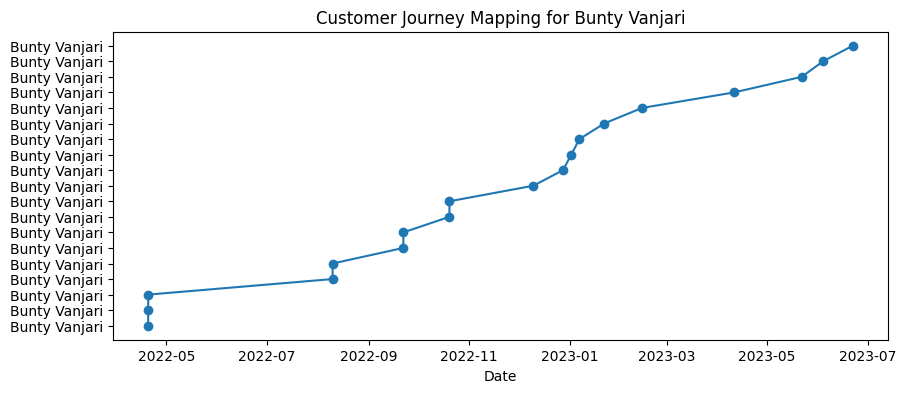



# Explanation
The customer journey mapping illustrates the interactions of Bunty Vanjari with Savita's Boutique over time.
Each data point represents a transaction, and the y-axis corresponds to the chronological order of transactions.


In [22]:

# Convert 'Date' column to datetime type
boutique['Date'] = pd.to_datetime(boutique['Date'], format='%d-%m-%Y')

# Get user input for the customer name
selected_customer = input("Enter the customer name: ")

# Filter the data for the selected customer
customer_data = boutique[boutique['Customer_Name'] == selected_customer]

# Check if the selected customer exists in the data
if customer_data.empty:
    print(f"No data found for the customer: {selected_customer}")
else:
    # Sort the data by date for the selected customer
    customer_data = customer_data.sort_values('Date')

    # Create the customer journey mapping
    plt.figure(figsize=(10, 4))
    plt.plot(customer_data['Date'], range(len(customer_data)), marker='o')
    plt.title(f'Customer Journey Mapping for {selected_customer}')
    plt.xlabel('Date')
    plt.yticks(range(len(customer_data)), customer_data['Customer_Name'])
    plt.show()

    # Auto-generated explanation
    explanation = f"\n\n# Explanation\n"
    explanation += f"The customer journey mapping illustrates the interactions of {selected_customer} with Savita's Boutique over time."
    explanation += f"\nEach data point represents a transaction, and the y-axis corresponds to the chronological order of transactions."

    print(explanation)


## ***Extra Work***

### **Price Sensitivity Analysis: Understanding Customer Preferences**

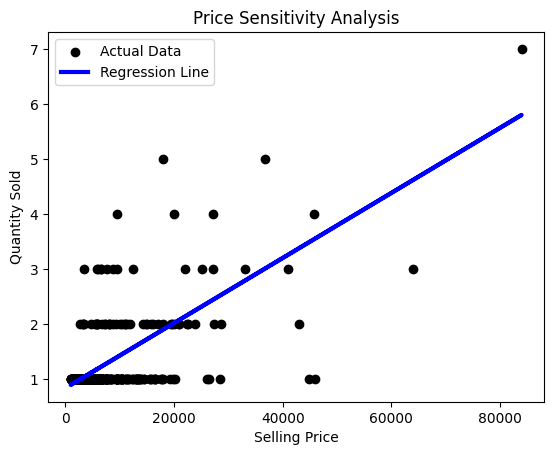

Mean Squared Error: 0.3008565455924003


# Explanation
The Mean Squared Error (MSE) is positive, indicating the model's performance in predicting quantity sold.


In [23]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select relevant columns for price sensitivity analysis
price_sensitivity_data = boutique[['Selling_Price', 'Quantity']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(price_sensitivity_data['Selling_Price'].values.reshape(-1, 1),
                                                    price_sensitivity_data['Quantity'].values, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize the results
plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.title('Price Sensitivity Analysis')
plt.xlabel('Selling Price')
plt.ylabel('Quantity Sold')
plt.legend()
plt.show()

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Auto-generated explanation
explanation = "\n\n# Explanation\n"

if mse >= 0:
    explanation += "The Mean Squared Error (MSE) is positive, indicating the model's performance in predicting quantity sold."
else:
    explanation += "The Mean Squared Error (MSE) is negative, which is unexpected in a regression context."

print(explanation)


### **Elbow Method and Customer Segmentation Perspectives**

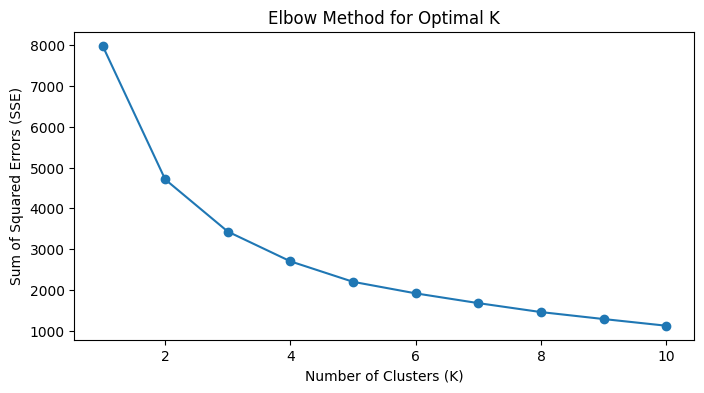

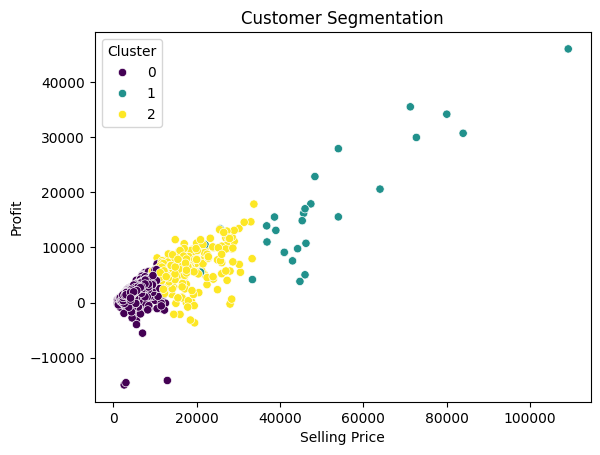

Optimal number of clusters (K) based on Elbow Method: 3
Customer Segmentation Results:
Cluster
0    1642
2     326
1      28
Name: count, dtype: int64


In [24]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def perform_customer_segmentation(data):
    # Select relevant columns for segmentation
    segmentation_data = data[['Selling_Price', 'Cost_Price', 'Quantity', 'Profit']]

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(segmentation_data)

    # Determine the optimal number of clusters using the Elbow Method
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(scaled_data)
        sse.append(kmeans.inertia_)

    # Plot the Elbow Method graph
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, 11), sse, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.show()

    # Based on the Elbow Method, choose the optimal number of clusters (K)
    optimal_k = 3

    # Apply k-means clustering
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    data['Cluster'] = kmeans.fit_predict(scaled_data)

    # Visualize the clusters
    sns.scatterplot(x='Selling_Price', y='Profit', hue='Cluster', data=data, palette='viridis')
    plt.title('Customer Segmentation')
    plt.xlabel('Selling Price')
    plt.ylabel('Profit')
    plt.show()

    # Explain the results
    print(f"Optimal number of clusters (K) based on Elbow Method: {optimal_k}")
    print("Customer Segmentation Results:")
    print(data['Cluster'].value_counts())

   

# Assuming 'boutique' is the DataFrame with the merged data
perform_customer_segmentation(boutique)


#### **List Of Customer Names Cluster-wise**

In [25]:

def find_customers_in_cluster(data):
    # Get user input for the desired cluster
    cluster_input = input("Enter the cluster (0, 1, or 2): ")

    # Check if the input is a valid cluster
    if cluster_input.isdigit() and int(cluster_input) in [0, 1, 2]:
        desired_cluster = int(cluster_input)

        # Get a list of customers in the specified cluster
        customers_in_cluster = data[data['Cluster'] == desired_cluster]['Customer_Name'].unique()

        if len(customers_in_cluster) > 0:
            print(f"\nCustomers in Cluster {desired_cluster}:\n")
            for customer in customers_in_cluster:
                print(customer)
        else:
            print(f"No customers found in Cluster {desired_cluster}")
    else:
        print("Invalid cluster input. Please enter 0, 1, or 2.")

# Assuming 'boutique' is the DataFrame with the merged data
find_customers_in_cluster(boutique)


Enter the cluster (0, 1, or 2):  1



Customers in Cluster 1:

Dr.Neeta Gangurde
Vaishali R Patil
Jyotsna Shete
Geeta Powar
Mandakini Patil
Pranita Patil
Jayahree N Pawar
Bharti Wagh
Bunty Vanjari
Naina Patil
Dr.Mauskar
Suvarna Chavhaan
Savita Borse


## ***Thank You***